In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from termcolor import colored

In [9]:
fpth = 'data/book_sales.csv'
time_column = 'Date'
cols_to_drop = ['Paperback']

df = pd.read_csv(fpth, index_col= time_column, parse_dates = True)
if cols_to_drop:
    df = df.drop(cols_to_drop, axis=1)
df.head(3)

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172


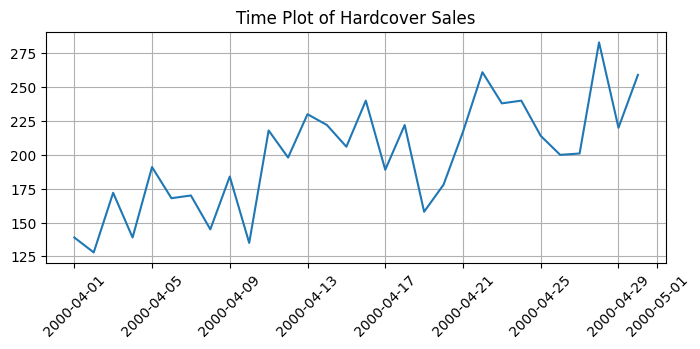

In [22]:
fig, ax = plt.subplots(figsize = (8,3))
ax.plot(df.index, df.Hardcover)
ax.tick_params(axis="x", rotation = 45)
ax.set_title('Time Plot of Hardcover Sales')
ax.grid()

#### Create both Time-step & Lag features 

In [17]:
# Before creating Time-step & Lag features, check for missing dates, to understand how to create those features
startDate = df.index[0]
endDate = df.index[-1]
print(f'Start date in df: {startDate}\nEnd date in df: {endDate}')

# because we have data for each day, hence, freq = D
possible_dates = pd.date_range(start = startDate, end = endDate, freq='D')
available_dates = df.index

missing_dates = possible_dates.difference(available_dates)
print(f'Total missing dates are : {len(missing_dates)}')
if len(missing_dates)>=1:
    print('Missing dates: ', missing_dates)

Start date in df: 2000-04-01 00:00:00
End date in df: 2000-04-30 00:00:00
Total missing dates are : 0


In [24]:
# Time-step feature
# Since no missing dates, we can create Time-step features simply as below
df['Time_dummy'] = np.arange(len(df.index))

# Lag feature
df['Lag_1'] = df['Hardcover'].shift(1)

df.dropna(inplace=True)
df.head(3)

,Hardcover,Time_dummy,Lag_1
Date,,,
2000-04-02,128,1,139.0
2000-04-03,172,2,128.0
2000-04-04,139,3,172.0


FOR only_Timestep
X.shape, y.shape:  (29, 1) (29,)
Linear Regression score: 0.49264550676543084 
MSE: 759.2593171394598 
Vehicles = 152.2167487684729 + 3.245320197044335 x Time_dummy



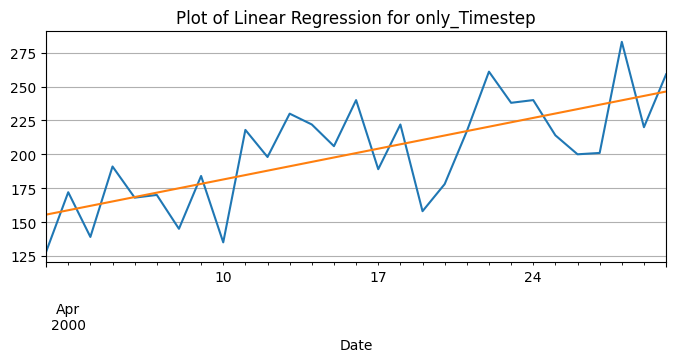

FOR only_Lag
X.shape, y.shape:  (29, 1) (29,)
Linear Regression score: 0.22629846503099837 
MSE: 1157.8494069603526 
Vehicles = 107.25217240540118 + 0.4759353312729348 x Lag_1



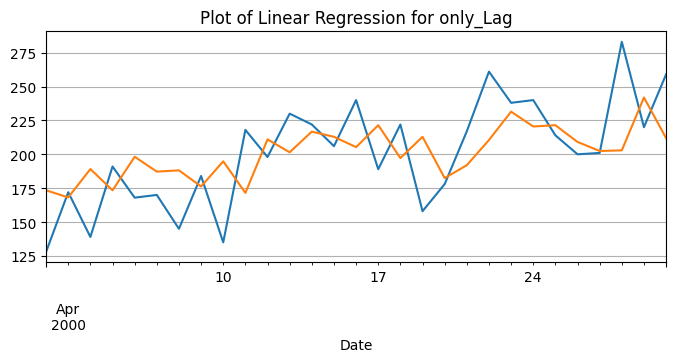

FOR Timestep + Lag
X.shape, y.shape:  (29, 2) (29,)
Linear Regression score: 0.4932013723548967 
MSE: 758.4274606495557 
Vehicles = 157.12038889475468 + 3.352680845423193 x Time_dummy + -0.0331068078701323 x Lag_1



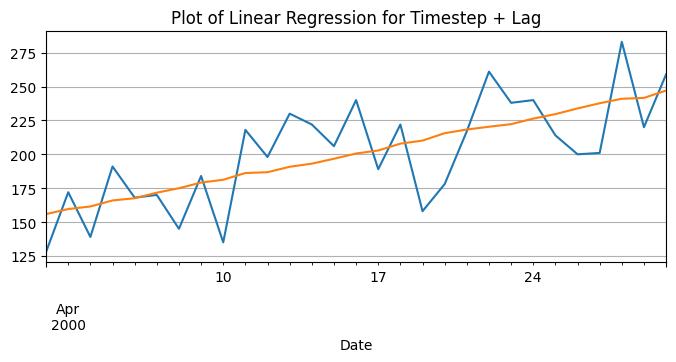

In [35]:
dep = 'Hardcover'
#indeps = ['Time_dummy', 'Lag_1']

indeps_combinations = {
    'only_Timestep': ['Time_dummy'],
    'only_Lag': ['Lag_1'], 
    'Timestep + Lag': ['Time_dummy', 'Lag_1']
}

for case, indeps in indeps_combinations.items():
    print(colored(f'FOR {case}', 'green', attrs=['bold']))
    
    # Fit a linear regression model 
    X = df.loc[:, indeps]
    y = df.loc[:,  dep]
    print('X.shape, y.shape: ', X.shape, y.shape)
    #print('X:\n', X.head(2), '\n\ny: \n', y.head(2))
    
    # Model
    lr = LinearRegression()
    lr.fit(X,y)
    print(colored(f'Linear Regression score: {lr.score(X, y)} ', 'red', attrs=['bold']))
    
    # Predictions
    y_pred = lr.predict(X)
    
    # make preds as a dataframe
    y_pred = pd.Series(y_pred, index = X.index)
    #print('\n\nPredictions:\n', y_pred.head(2))
    print(colored(f'MSE: {mean_squared_error(y, y_pred)} ', 'red', attrs=['bold']))
    
    # Equation
    formula = f'Vehicles = {lr.intercept_}'
    for i in range(len(indeps)):
        formula += f' + {lr.coef_[i]} x {indeps[i]}'
    
    print(colored(formula, 'red', attrs=['bold']))
    print()
    fig, ax = plt.subplots(figsize=(8,3))
    ax = y.plot()
    ax = y_pred.plot()
    ax.set_title(f'Plot of Linear Regression for {case}')
    ax.grid()
    plt.show()

I notice __a large difference in linear regression coefficients for Timestep + Lag case__. It is because scale of both variables are different.

We should use __Scaling__ where all features should have same range

FOR only_Timestep
X.shape, y.shape:  (29, 1) (29,)
Linear Regression score: 0.49264550676543084 
MSE: 759.2593171394598 
Vehicles = 200.89655172413794 + 27.152296821706827 x Time_dummy



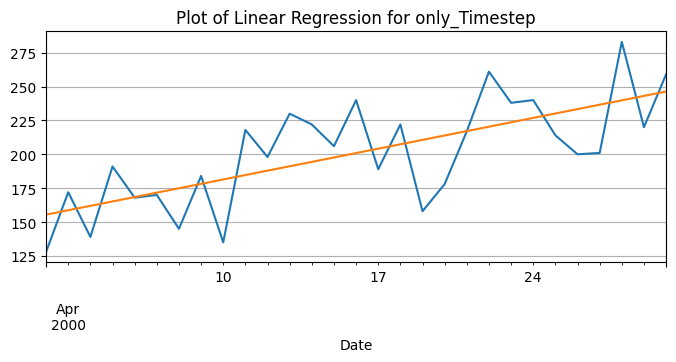

FOR only_Lag
X.shape, y.shape:  (29, 1) (29,)
Linear Regression score: 0.22629846503099837 
MSE: 1157.8494069603526 
Vehicles = 200.89655172413794 + 18.402639290959836 x Lag_1



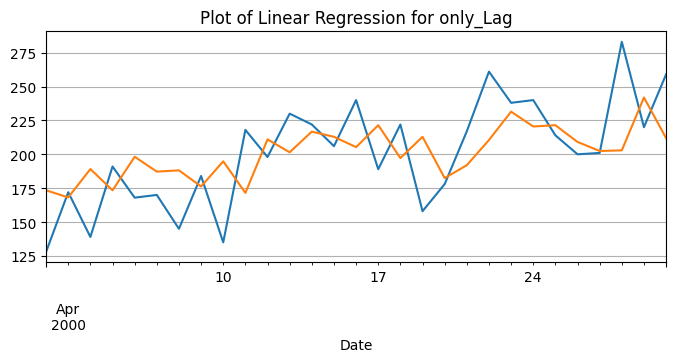

FOR Timestep + Lag
X.shape, y.shape:  (29, 2) (29,)
Linear Regression score: 0.4932013723548967 
MSE: 758.4274606495558 
Vehicles = 200.89655172413794 + 28.050540450920536 x Time_dummy + -1.280116442878181 x Lag_1



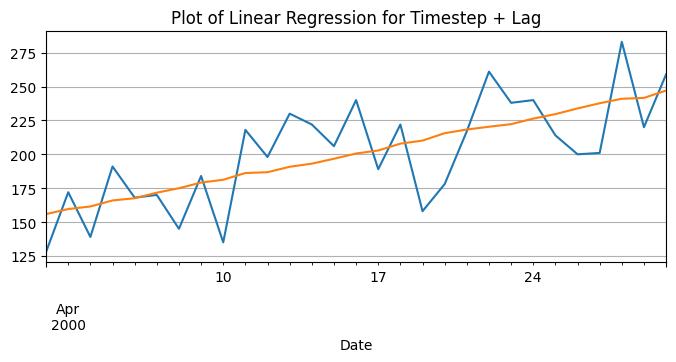

In [47]:
dep = 'Hardcover'
#indeps = ['Time_dummy', 'Lag_1']

indeps_combinations = {
    'only_Timestep': ['Time_dummy'],
    'only_Lag': ['Lag_1'], 
    'Timestep + Lag': ['Time_dummy', 'Lag_1']
}

for case, indeps in indeps_combinations.items():
    print(colored(f'FOR {case}', 'green', attrs=['bold']))
    
    # Fit a linear regression model 
    X = df.loc[:, indeps]
    y = df.loc[:,  dep]
    print('X.shape, y.shape: ', X.shape, y.shape)
    #print('X:\n', X.head(2), '\n\ny: \n', y.head(2))
    scaler = StandardScaler()
    scaler.fit(X)
    X_tr = scaler.transform(X)
    
    # Model
    lr = LinearRegression()
    lr.fit(X_tr,y)
    print(colored(f'Linear Regression score: {lr.score(X_tr, y)} ', 'red', attrs=['bold']))
    
    # Predictions
    y_pred = lr.predict(X_tr)
    
    # make preds as a dataframe
    y_pred = pd.Series(y_pred, index = X.index)
    #print('\n\nPredictions:\n', y_pred.head(2))
    print(colored(f'MSE: {mean_squared_error(y, y_pred)} ', 'red', attrs=['bold']))
    
    # Equation
    formula = f'Vehicles = {lr.intercept_}'
    for i in range(len(indeps)):
        formula += f' + {lr.coef_[i]} x {indeps[i]}'
    
    print(colored(formula, 'red', attrs=['bold']))
    print()
    fig, ax = plt.subplots(figsize=(8,3))
    ax = y.plot()
    ax = y_pred.plot()
    ax.set_title(f'Plot of Linear Regression for {case}')
    ax.grid()
    plt.show()
